# **1. Perkenalan**

Nama : Naufaldy Erianda

Batch : 008

# **2. Import Libraries**

In [1]:
import  pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from feature_engine.outliers import OutlierTrimmer,Winsorizer
from feature_engine.imputation import MeanMedianImputer
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
import pickle

import warnings
warnings.filterwarnings("ignore")


# **3. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
#import data and make a copy
data = pd.read_csv('data1.csv',delimiter=';')
df = data.copy()
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [4]:
df.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,sale product views,app transactions,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,100.107711,4.479448,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,19.568609,2.461214,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,87.000000,3.000000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,100.000000,4.000000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,113.000000,6.000000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,20.000000,9.000000,1.000000


terlihat akan ada beberapa kolom yang terdapat outliers. jarak antara nilai 75& dan max terlalu jauh. akan dibuktikan nnti setelah melakukan check distribusi dan outliers

In [5]:
df.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

Setelah melakukan pengecheckan missing values, tidak terdapat missing values dalam data set tersebut

In [7]:
# drop column

df.drop(columns='user id',axis = 1 , inplace= True)

In [8]:
df

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


menghapus kolom user id karena menurut saya dalam kolom user id ini tidak terdapat informasi yang bisa mengubah atau menentukan hasil prediksi nanti

In [9]:
#rename columns

df = df.rename(columns={'account length' : 'acc_lenght',
                    'location code': 'loc_code',
                    'credit card info save' : 'cc_info',
                    'push status' : 'push_stat',
                    'add to wishlist' : 'wishlist',
                    'desktop sessions' : 'desk_session',
                    'app sessions':'app_session',
                    'desktop transactions':'desk_trans',
                    'total product detail views' : 'total_prod_dv',
                    'session duration': 'session_dur',
                    'promotion clicks':'promotion_click',
                    'avg order value' : 'avg_ov',
                    'sale product views' : 'sale_prod_view',
                    'discount rate per visited products' : 'disrate_per_visprod',
                    'product detail view per app session' : 'prod_dv_per_as',
                    'app transactions' : 'app_trans',
                    'add to cart per session' : 'add_to_cart_session',
                    'customer service calls' : 'cs_calls'
})

df

,acc_lenght,loc_code,cc_info,push_stat,wishlist,desk_session,app_session,desk_trans,total_prod_dv,session_dur,promotion_click,avg_ov,sale_prod_view,disrate_per_visprod,prod_dv_per_as,app_trans,add_to_cart_session,cs_calls,churn
0,128,415,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


saya merename hampir semua kolom agar lebih mudah saat ini proses pengodingan

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   acc_lenght           3333 non-null   int64 
 1   loc_code             3333 non-null   int64 
 2   cc_info              3333 non-null   object
 3   push_stat            3333 non-null   object
 4   wishlist             3333 non-null   int64 
 5   desk_session         3333 non-null   int64 
 6   app_session          3333 non-null   int64 
 7   desk_trans           3333 non-null   int64 
 8   total_prod_dv        3333 non-null   int64 
 9   session_dur          3333 non-null   int64 
 10  promotion_click      3333 non-null   int64 
 11  avg_ov               3333 non-null   object
 12  sale_prod_view       3333 non-null   int64 
 13  disrate_per_visprod  3333 non-null   object
 14  prod_dv_per_as       3333 non-null   object
 15  app_trans            3333 non-null   int64 
 16  add_to

In [11]:
df

,acc_lenght,loc_code,cc_info,push_stat,wishlist,desk_session,app_session,desk_trans,total_prod_dv,session_dur,promotion_click,avg_ov,sale_prod_view,disrate_per_visprod,prod_dv_per_as,app_trans,add_to_cart_session,cs_calls,churn
0,128,415,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [12]:
df.columns

Index(['acc_lenght', 'loc_code', 'cc_info', 'push_stat', 'wishlist',
       'desk_session', 'app_session', 'desk_trans', 'total_prod_dv',
       'session_dur', 'promotion_click', 'avg_ov', 'sale_prod_view',
       'disrate_per_visprod', 'prod_dv_per_as', 'app_trans',
       'add_to_cart_session', 'cs_calls', 'churn'],
      dtype='object')

In [13]:
#change values , to .

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace(',', '.')

df

,acc_lenght,loc_code,cc_info,push_stat,wishlist,desk_session,app_session,desk_trans,total_prod_dv,session_dur,promotion_click,avg_ov,sale_prod_view,disrate_per_visprod,prod_dv_per_as,app_trans,add_to_cart_session,cs_calls,churn
0,128,415,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10,3,2.7,1,0
1,107,415,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.7,1,0
2,137,415,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156,27,18,77,216,126,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,no,no,0,231,39,13,57,153,55,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,no,no,0,181,31,25,109,289,58,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,yes,no,0,214,36,14,105,160,84,139.2,137,6.26,5,10,1.35,2,0


In [14]:
#change type

df = df.astype({"avg_ov": float, 
                "disrate_per_visprod": float,
                'prod_dv_per_as': float,
                'add_to_cart_session': float
                })

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acc_lenght           3333 non-null   int64  
 1   loc_code             3333 non-null   int64  
 2   cc_info              3333 non-null   object 
 3   push_stat            3333 non-null   object 
 4   wishlist             3333 non-null   int64  
 5   desk_session         3333 non-null   int64  
 6   app_session          3333 non-null   int64  
 7   desk_trans           3333 non-null   int64  
 8   total_prod_dv        3333 non-null   int64  
 9   session_dur          3333 non-null   int64  
 10  promotion_click      3333 non-null   int64  
 11  avg_ov               3333 non-null   float64
 12  sale_prod_view       3333 non-null   int64  
 13  disrate_per_visprod  3333 non-null   float64
 14  prod_dv_per_as       3333 non-null   float64
 15  app_trans            3333 non-null   i

Saya melakukan pergantian values , ke . untuk mengganti type kolom di dataset tersebut, karena terdapat data set yang berisikan angka tetapi type nya object

# **4.Exploration Data Analysis**

Pada Eksplorasi data analysis akan dilakukan analysis terkait target ,numeric dan categorical columns

## 4.1. Churn

In [16]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

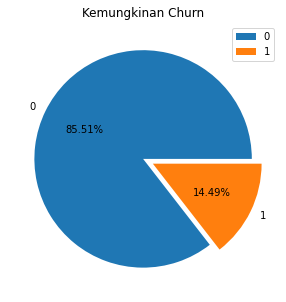

In [17]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(df.churn.value_counts(), labels=df.churn.unique(), explode= (0, 0.1), autopct='%.2f%%')
ax.set_title('Kemungkinan Churn')
plt.legend()

Sebanyak 85.51% tidak churn dan 14.49% churn. Dari segi datanya untuk membuat sebuah prediksi, data ini termasuk data imbalance.

## 4.2. Numeric Vs Target

### Desktop Session

Text(0.5, 1.0, 'Not Churn')

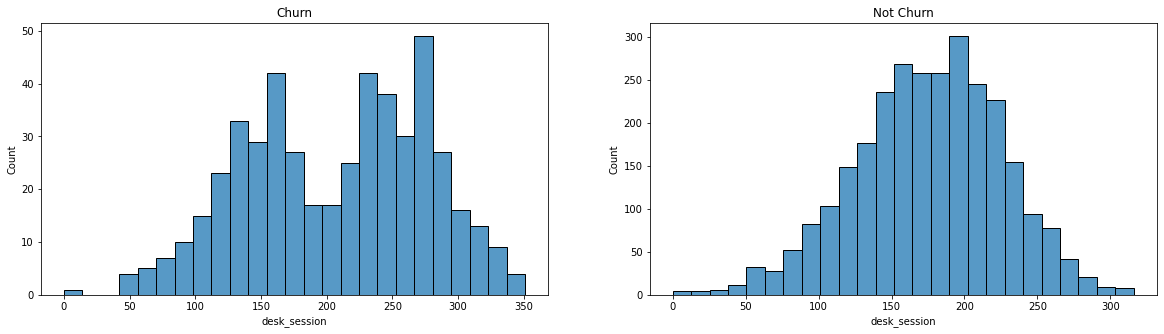

In [18]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(x=df.desk_session[df.churn == 1],bins=25, ax=ax[0])
sns.histplot(x=df.desk_session[df.churn == 0],bins=25, ax=ax[1])

ax[0].set_title('Churn')
ax[1].set_title('Not Churn')

lama nya customer yang mengangkses e-commerce melalui desktop tidak menjamin kalau orang tersebut kan bertahan. jika dilihat hari distribusinya, rata - rata orang menghabiskan waktu di desktopnya adalah 150 - 250 .

### Application Session

Text(0.5, 1.0, 'Not Churn')

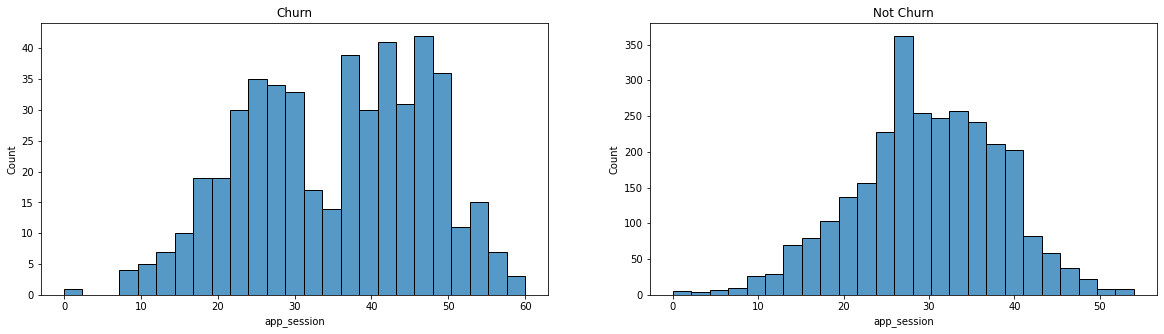

In [19]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(x=df.app_session[df.churn == 1],bins=25, ax=ax[0])
sns.histplot(x=df.app_session[df.churn == 0],bins=25, ax=ax[1])

ax[0].set_title('Churn')
ax[1].set_title('Not Churn')

ternyata customer lebih lama menghabiskan waktunya untuk menggunakan desktop dibandingkan dengan aplikasi. customer yang memilih meninggalkan e-commerce cenderung menghabiskan waktu lebih lama saat mengakses aplikasi, ada kemungkinan mereka bingunan saat menggunakan aplikasi dan mencoba untuk lebih memahaminya tapi gagal.

### Wishlist

Text(0.5, 1.0, 'Not Churn')

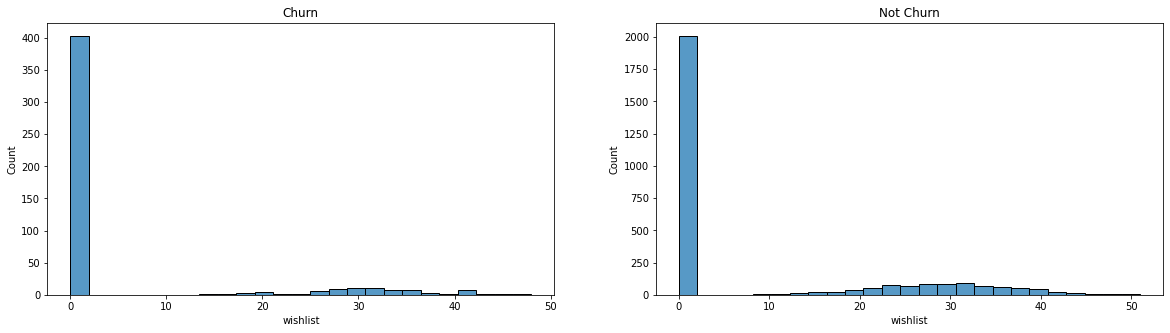

In [20]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(x=df.wishlist[df.churn == 1],bins=25, ax=ax[0])
sns.histplot(x=df.wishlist[df.churn == 0],bins=25, ax=ax[1])

ax[0].set_title('Churn')
ax[1].set_title('Not Churn')

ternyata pelanggan yang tetap setia maupun tidak setia hanya memasukan barang ke wishlist tidak lebih dati 10 jumlahnya.

### Desktop Transactions

Text(0.5, 1.0, 'Not Churn')

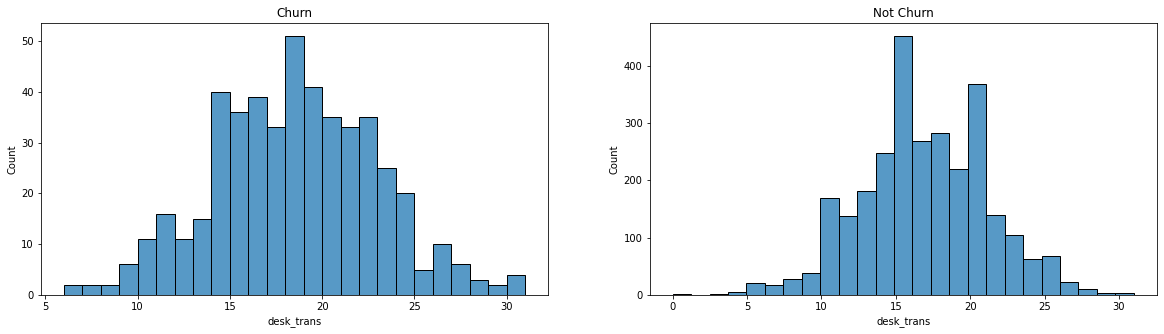

In [21]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(x=df.desk_trans[df.churn == 1],bins=25, ax=ax[0])
sns.histplot(x=df.desk_trans[df.churn == 0],bins=25, ax=ax[1])

ax[0].set_title('Churn')
ax[1].set_title('Not Churn')

customer yang tetap setia rata - rata memiliki 15 transaksi dalam sebulannya.

### Application Transaction

Text(0.5, 1.0, 'Not Churn')

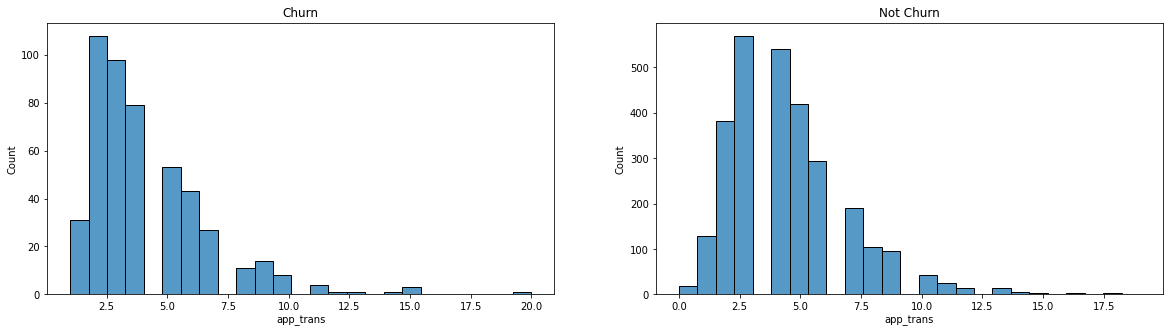

In [22]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(x=df.app_trans[df.churn == 1],bins=25, ax=ax[0])
sns.histplot(x=df.app_trans[df.churn == 0],bins=25, ax=ax[1])

ax[0].set_title('Churn')
ax[1].set_title('Not Churn')

Jika dibandingkan dengan transaksi melalui desktop jumlah orang yang menggunakan applikasi cenderung melakukan transaksi tidak sebanyak saat menggunakan desktop. bahkan customer yang memilih untuk meninggalkan e-commerce pun lebih sering menggunakan app daripada desk

## 4.3. Categorical Vs Target

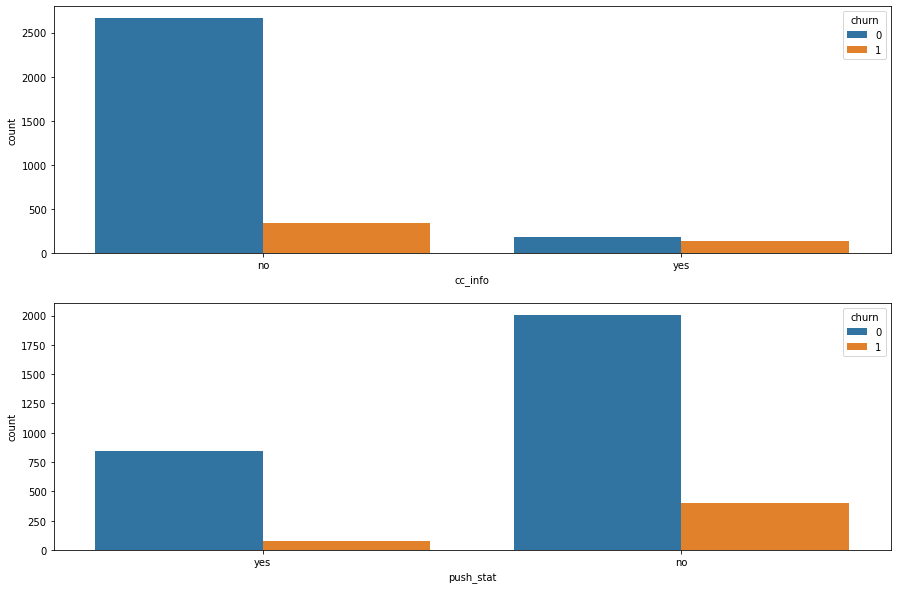

In [23]:
ord_car = df.select_dtypes(exclude = np.number).columns.tolist()

fig, ax = plt.subplots(2,1, figsize=(15,10))

for cat,ax in zip(ord_car,ax.flatten()):
    sns.countplot(cat,data=df,hue='churn',ax=ax)

Kebanyakan customer tidak save info kartu kreditnya mungkin karena customer takut informasi terkait kartu kreditnya di curi / terjadi hal hal yang tidak diinginkan

# **5. Data Preprocessing**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5.1 Splitting Data

In [24]:
#data inference

df_inf = df.sample(10, random_state=16)
df_inf

,acc_lenght,loc_code,cc_info,push_stat,wishlist,desk_session,app_session,desk_trans,total_prod_dv,session_dur,promotion_click,avg_ov,sale_prod_view,disrate_per_visprod,prod_dv_per_as,app_trans,add_to_cart_session,cs_calls,churn
1818,78,408,no,no,0,139,24,16,140,191,113,286.5,125,12.89,11.8,3,3.19,3,0
643,49,415,no,no,0,214,36,23,79,265,93,239.8,128,10.79,15.6,7,4.21,0,0
2360,68,415,no,no,0,222,38,17,107,199,102,162.4,107,7.31,9.4,3,2.54,2,0
2094,141,415,no,no,0,192,33,13,111,157,87,175.8,82,7.91,11.0,6,2.97,0,0
514,60,408,yes,yes,29,266,45,18,113,216,94,108.1,82,4.86,14.0,12,3.78,0,1
3184,72,415,no,no,0,197,33,13,88,159,129,269.3,118,12.12,6.8,3,1.84,0,0
2810,90,415,no,yes,42,193,33,22,66,263,85,214.4,97,9.65,11.1,4,3.00,0,0
1211,94,408,no,no,0,174,30,20,85,241,114,207.8,94,9.35,7.9,1,2.13,1,0
1128,114,415,yes,yes,31,175,30,19,104,224,92,116.3,91,5.23,12.3,10,3.32,2,0
1576,94,408,no,no,0,119,20,17,90,205,57,172.2,100,7.75,10.4,6,2.81,3,0


In [25]:
#split X and Y
X = df.drop(['churn'],axis = 1)
y = df['churn']

In [26]:
#splitting train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 , random_state = 16)


print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (2499, 18)
Shape of X_test: (834, 18)
Shape of y_train: (2499,)
Shape of y_test: (834,)


## 5.2 Future Selection

pada bagian ada ini akan dilakukan beberapa metode feature selection.
-   pearson correlation heat map 
-   feature importance
-   select k-best

### 5.2.1 Pearson Correlation Heat Map

In [27]:
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

X_train_num =X_train[num_columns].copy()
y_train_num =y_train.copy()

X_train_num.reset_index(drop=True,inplace=True)
y_train_num.reset_index(drop=True,inplace=True)

train_set = pd.concat([X_train_num,y_train_num],axis=1)

train_set

,acc_lenght,loc_code,wishlist,desk_session,app_session,desk_trans,total_prod_dv,session_dur,promotion_click,avg_ov,sale_prod_view,disrate_per_visprod,prod_dv_per_as,app_trans,add_to_cart_session,cs_calls,churn
0,134,415,0,142,24,17,95,206,101,218.5,60,9.83,8.8,6,2.38,0,0
1,62,415,0,245,42,10,91,123,130,228.4,102,10.28,8.5,4,2.30,4,0
2,72,408,0,147,25,14,79,162,103,162.9,80,7.33,10.5,4,2.84,1,0
3,98,415,0,217,37,26,121,303,73,197.1,71,8.87,12.4,2,3.35,0,1
4,75,415,0,315,53,14,102,170,86,285.1,100,12.83,5.7,3,1.54,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,98,415,0,0,0,14,0,160,130,167.1,88,7.52,6.8,1,1.84,4,1
2495,171,415,25,223,38,16,77,183,118,150.8,90,6.79,10.2,3,2.75,3,0
2496,156,415,0,175,30,17,65,197,116,238.5,86,10.73,10.6,2,2.86,0,0
2497,94,415,0,190,32,8,91,92,107,224.8,108,10.12,13.6,17,3.67,2,0


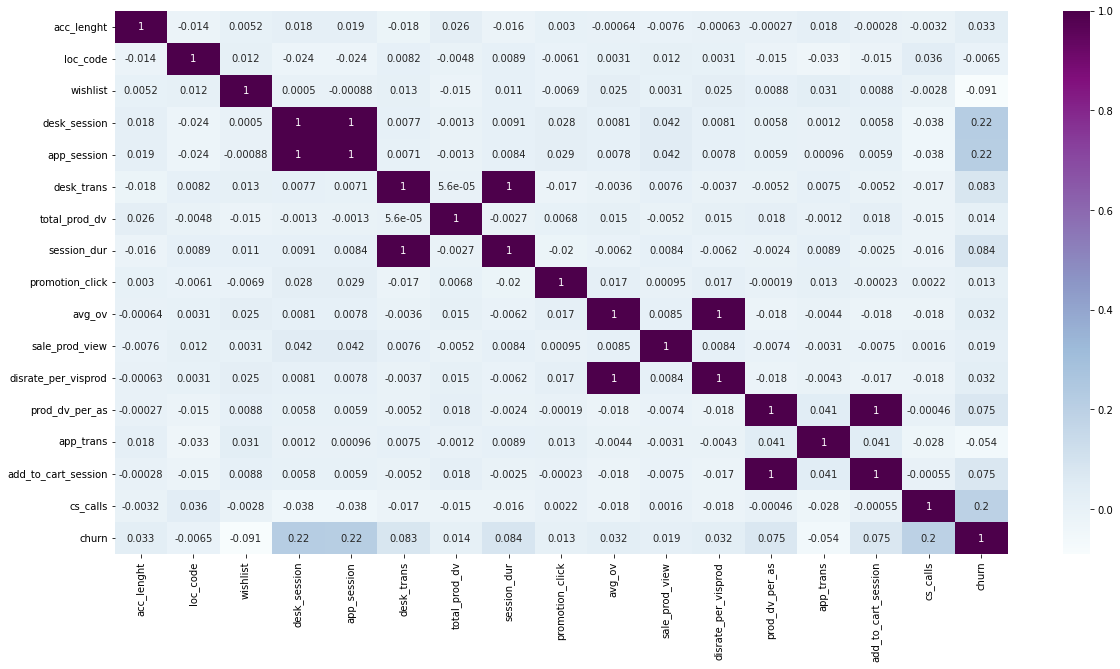

In [28]:
corr_num = train_set.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_num,cmap="BuPu",annot=True);
plt.show()

Nilai correlation terendah terhadap churn adalah kolom loc_code dengan nilai -0.0065. Karena menurut saya pribadi koloom loc_code tersebut menunjukan lokasi customer dan menurut hal tersebut pun dapat mempengaruhi saat memprediksian targetm jadi saya tidak akan membuang kolom tersebut.

terdapat nilai corr 1 antar kolom yang artinya terdapat multicollinearity antara feature. untuk mencegah supaya tidak terjadi multicolliearity saat pemprediksiaan maka harus dipilih salah satu antara kedua kolom yang memiliki nilai corr 1. 

maka akan saya buang:
-   app_session
-   session_dur
-   avg_ov
-   prod_dv_per_as


In [29]:
#drop columns

X_train.drop(['app_session','session_dur','avg_ov','prod_dv_per_as'], axis =1,inplace=True)
X_test.drop(['app_session','session_dur','avg_ov','prod_dv_per_as'], axis =1,inplace=True)

### 5.2.2 Feature Importance

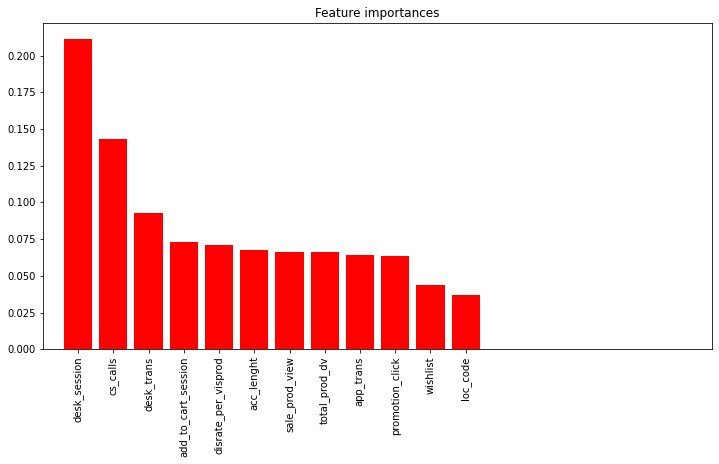

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
X_train_num = X_train[num_columns].copy()

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train_num, y_train)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train_num.shape[1]), model.feature_importances_[sorted_idx],
        color="r", align="center")
plt.xticks(range(X_train_num.shape[1]), X_train_num.columns[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Jika dilihat dari Feature Importance, kolom loc_code memiliki nilai terendah dibandingkan dengan yang lainnya. 

Ada 3 kolom terpenting yaitu , cs_calls, desk_session, app_session.

ada 2 kolom yang nilainya dibawah 0,05 : wishlist dan loc_code.

Setelah melihat dari feature importance saya akan menghapus kolom yang nilainya dibawah 0,5:
-   wishtlist
-   loc_code

In [31]:
#drop columns

X_train.drop(['wishlist','loc_code'], axis =1,inplace=True)
X_test.drop(['wishlist','loc_code'], axis =1,inplace=True)

### 5.2.3 K-Best

In [32]:
feat_encoded = LabelEncoder() #categorical encoder
train_cat = X_train.select_dtypes(include="object")
feat_cat= train_cat.apply(feat_encoded.fit_transform)

In [33]:
fs_cat = SelectKBest(score_func=chi2, k='all')

X_features_cat = fs_cat.fit_transform(feat_cat, y_train)

Feature cc_info : 136.60 
Feature push_stat : 19.88 



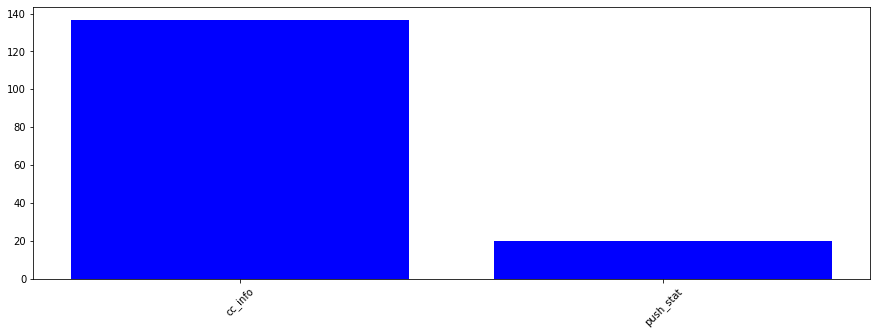

In [34]:
for col in list(feat_cat.columns):
  score = fs_cat.scores_[feat_cat.columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

plt.figure(figsize=(15,5));
plt.bar([col for col in list(feat_cat.columns)], fs_cat.scores_ , color="blue");
plt.xticks(rotation=45);

Setelah melakukan K-best, diketahui bahwa kolom push_stat tidak terlalu penting untuk menentekan custumer tersebut akan churn atau tidak. jadi saya juga akan menghapus kolom push_stat

In [35]:
 #drop colomns
X_train = X_train.drop('push_stat',axis=1)
X_test = X_test.drop('push_stat',axis=1)


In [36]:
X_train

,acc_lenght,cc_info,desk_session,desk_trans,total_prod_dv,promotion_click,sale_prod_view,disrate_per_visprod,app_trans,add_to_cart_session,cs_calls
1737,134,no,142,17,95,101,60,9.83,6,2.38,0
3147,62,no,245,10,91,130,102,10.28,4,2.30,4
1264,72,no,147,14,79,103,80,7.33,4,2.84,1
2213,98,no,217,26,121,73,71,8.87,2,3.35,0
815,75,no,315,14,102,86,100,12.83,3,1.54,2
...,...,...,...,...,...,...,...,...,...,...,...
1345,98,no,0,14,0,130,88,7.52,1,1.84,4
581,171,no,223,16,77,118,90,6.79,3,2.75,3
2169,156,no,175,17,65,116,86,10.73,2,2.86,0
3310,94,no,190,8,91,107,108,10.12,17,3.67,2


In [37]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (2499, 11)
Shape of X_test: (834, 11)


Yang tadinya ada 18 kolom sekarang sudah menjadi 11 kolom

## 5.3 Handling Outliers

### Distribution Check

In [38]:
#membuat dataset untuk mendeskripsikan distribusi

distribution = pd.DataFrame(X_train.skew(axis=0), columns = ['skew']).reset_index()
distribution['dist'] = np.where((distribution['skew'] < 0.5) & (distribution['skew'] > -0.5), 'normal', 'skew')
distribution.rename(columns={'index':'columns'},inplace=True)


distribution

,columns,skew,dist
0,acc_lenght,0.098049,normal
1,desk_session,-0.046320,normal
2,desk_trans,0.044101,normal
3,total_prod_dv,-0.137658,normal
4,promotion_click,-0.040058,normal
5,sale_prod_view,0.036313,normal
6,disrate_per_visprod,-0.014839,normal
7,app_trans,1.363327,skew
8,add_to_cart_session,-0.243171,normal
9,cs_calls,1.074465,skew


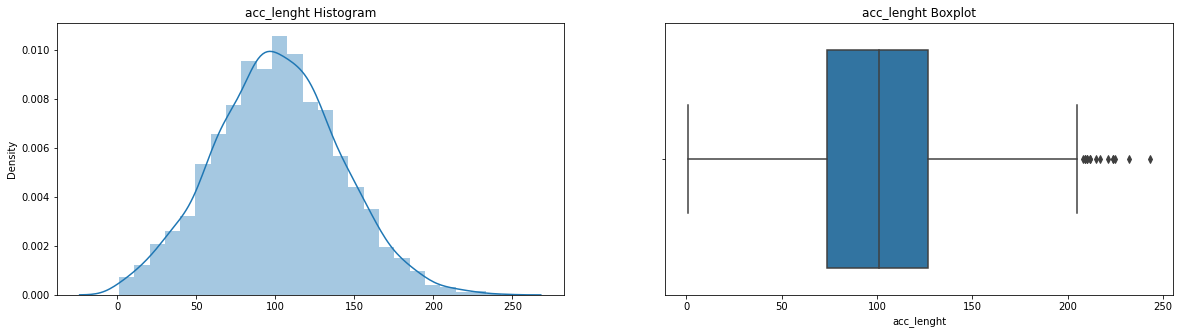

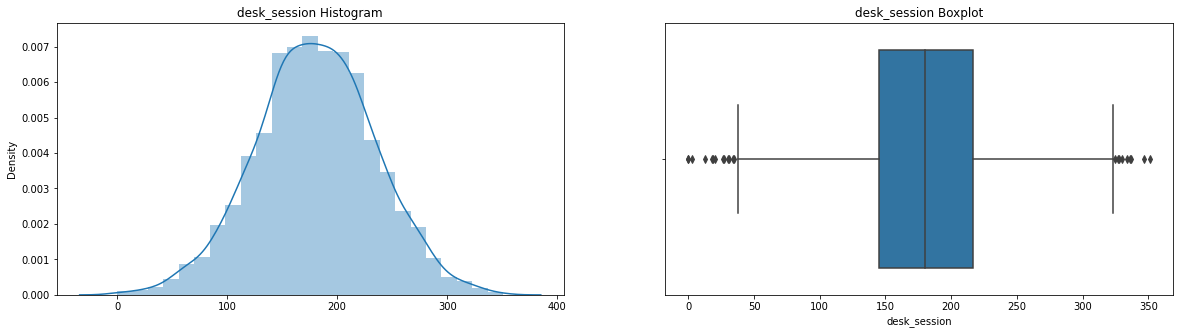

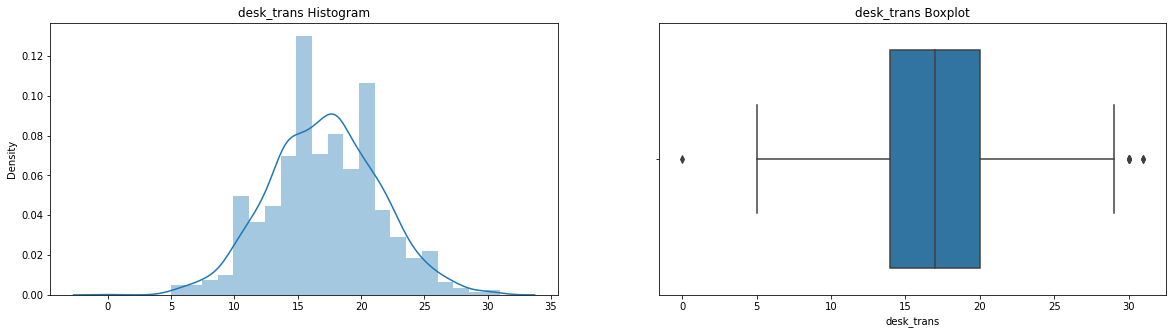

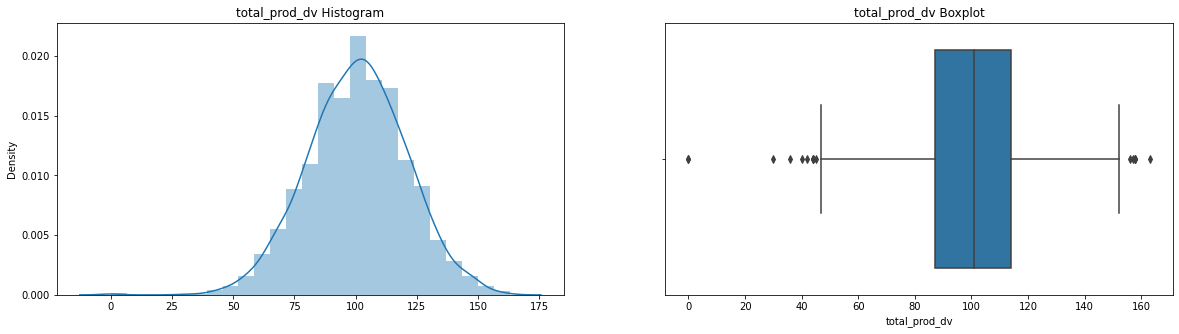

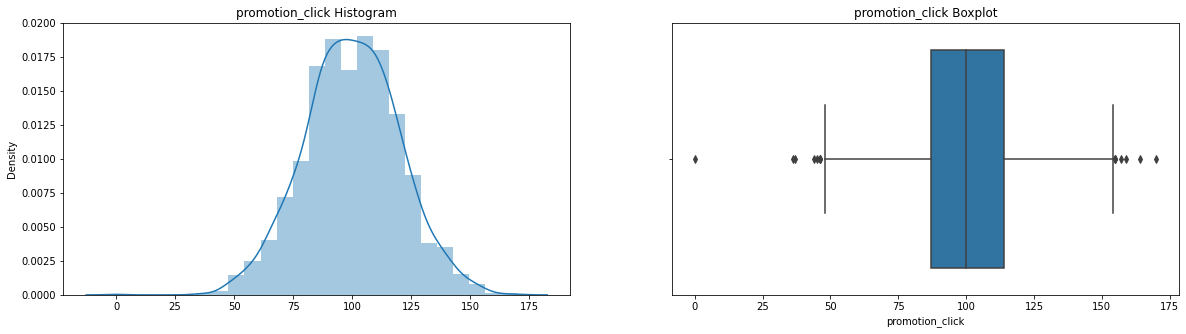

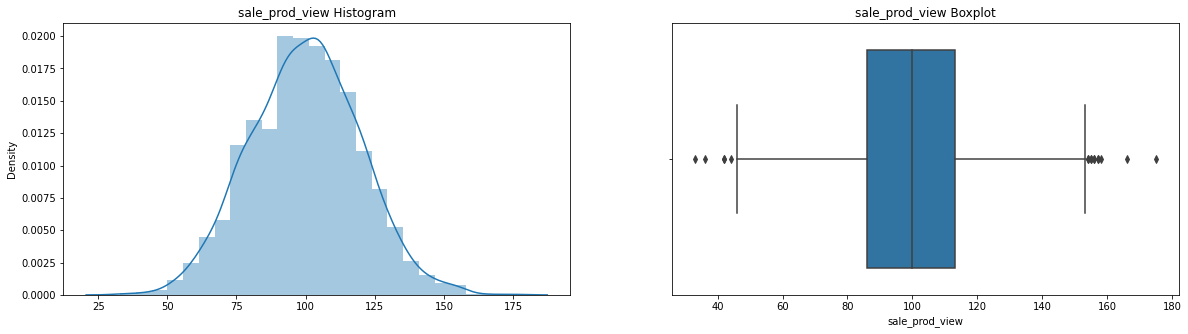

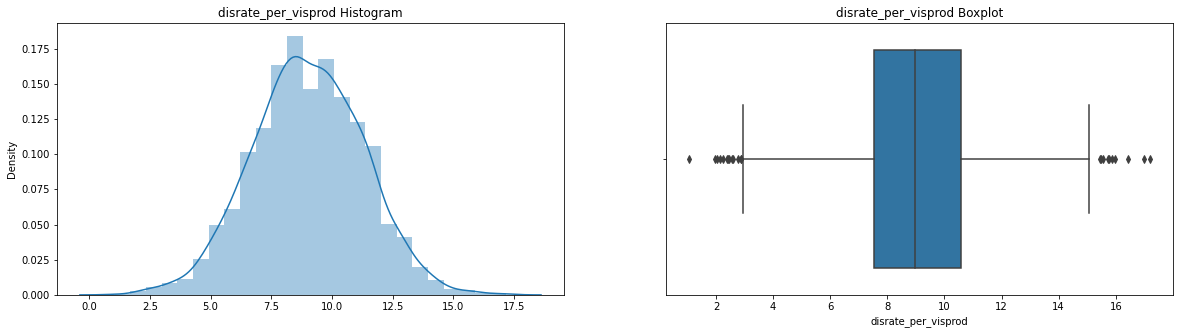

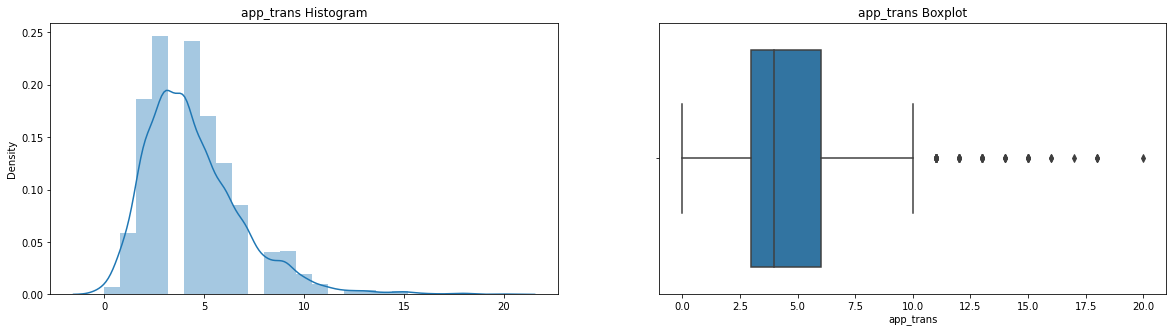

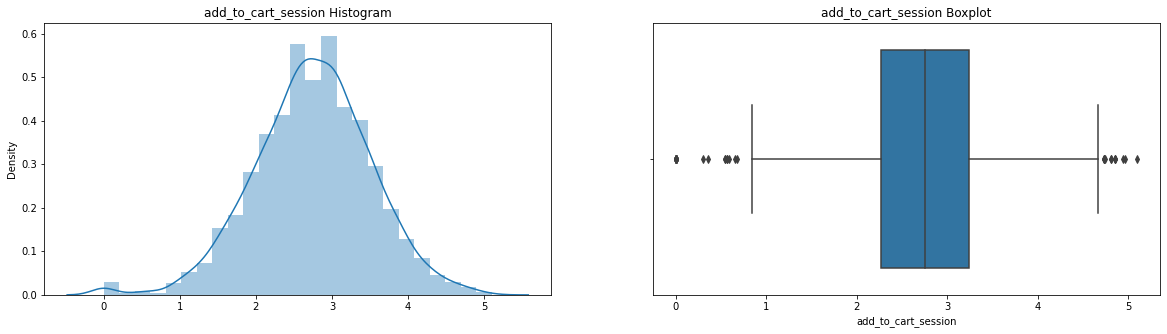

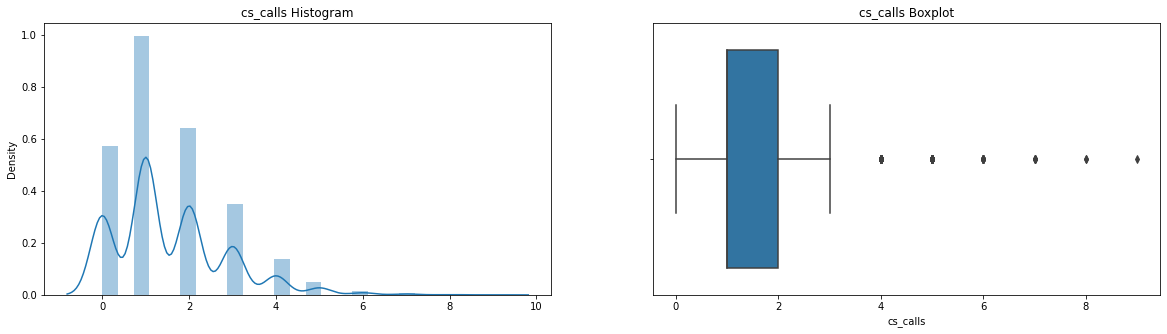

In [39]:
for row in distribution.index.tolist():
    col= distribution.iloc[row]['columns']

    fig,ax = plt.subplots(1,2, figsize=(20,5))

    sns.distplot(x=X_train[col],bins=25, ax=ax[0])
    sns.boxplot(x=X_train[col], ax=ax[1])

    ax[0].set_title(col + ' ' + 'Histogram')
    ax[1].set_title(col + ' ' + 'Boxplot')

plt.show()

Dari 10 kolom yang di check distribusinya terdapat 8 kolom berdistribusi normal dan 2 kolom berdistribusi tidak normal (skew), yaitu kolom cs_calls dan app_trans

Jika kita lihat box plot dari kolom cs_calls dan app _trans terdapat outliers disana, akan saya cari tahu berapa jumlah outliers yang terdapat pada masing - masing kolom

### Check Outliers

In [40]:
#fungsi untuk data yang berdistribusi tidak normal
def skew_boundaries(df, variable, distance):
    iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lb = df[variable].quantile(0.25) - (iqr * distance)
    ub = df[variable].quantile(0.75) + (iqr * distance)

    return ub,lb

#fungsi untuk data yang berdistribusi normal
def normal_boundaries(df, variable, distance):
    ub = df[variable].mean() + distance * df[variable].std()
    lb = df[variable].mean() - distance * df[variable].std()

    return ub,lb

#membuat data set yang numerik, karena yang categorical tidak bisa dicari outliernya

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
train_num = X_train[num_columns].copy()

#membuat kumpulan list yang nntinya akan disi oleh hasil perhitungan dan akan dibuat dataset untuk ditampilkan
outliers = {
    'columns': [],
    'upper_boundary': [],
    'lower_boundary': [],
    'total_outliers': [],
    'bigger_than_ub_percent': [],
    'lower_than_lb_percent': [],
    'total_percent': []}

#menggunakan looping untuk mengecek outliers dari dataset yang sudah disediakan
for i in distribution.index.tolist():
    col=distribution.iloc[i]['columns']
    dist = distribution.iloc[i]['dist']
    
    if dist == 'skew':
        ub,lb = skew_boundaries(X_train,col,1.5)
    else:
        ub,lb = normal_boundaries(X_train,col,3)

    total = len(train_num[train_num[col] > ub]) + len(train_num[train_num[col] < lb])
    ubpercent = len(train_num[train_num[col] > ub])/len(train_num) * 100
    lbpercent = len(train_num[train_num[col] < lb])/len(train_num) * 100
    totalpercent = ubpercent + lbpercent

    #memasukan hasil perhitungan outliers kelist
    outliers['columns'].append(col)
    outliers['upper_boundary'].append(ub)
    outliers['lower_boundary'].append(lb)
    outliers['total_outliers'].append(total)
    outliers['bigger_than_ub_percent'].append(ubpercent)
    outliers['lower_than_lb_percent'].append(lbpercent)
    outliers['total_percent'].append(totalpercent)

#membuat kumpulan list menjadi sebuah data set baru
outliers = pd.DataFrame(outliers)
outliers = pd.merge(outliers,distribution)
outliers

,columns,upper_boundary,lower_boundary,total_outliers,bigger_than_ub_percent,lower_than_lb_percent,total_percent,skew,dist
0,acc_lenght,220.216061,-18.052796,6,0.240096,0.000000,0.240096,0.098049,normal
1,desk_session,343.267333,17.096813,6,0.080032,0.160064,0.240096,-0.046320,normal
2,desk_trans,30.062734,4.154152,3,0.080032,0.040016,0.120048,0.044101,normal
3,total_prod_dv,161.098909,40.161595,6,0.040016,0.200080,0.240096,-0.137658,normal
4,promotion_click,160.358091,39.402614,5,0.080032,0.120048,0.200080,-0.040058,normal
5,sale_prod_view,158.981565,40.752729,4,0.080032,0.080032,0.160064,0.036313,normal
6,disrate_per_visprod,15.838770,2.178036,9,0.200080,0.160064,0.360144,-0.014839,normal
7,app_trans,10.500000,-1.500000,55,2.200880,0.000000,2.200880,1.363327,skew
8,add_to_cart_session,5.034739,0.458691,18,0.040016,0.680272,0.720288,-0.243171,normal
9,cs_calls,3.500000,-0.500000,193,7.723089,0.000000,7.723089,1.074465,skew


Jika kita lihat pada tabel diatas, terdapat 7,7% outliers pada kolom cs_calls dan sisanya hanya dibawah 5%.
Untuk menghandle outliers akan dilakukan cara sebagai berikut:
-   Outiers <5% akan ditrim
-   Outliers >5% - 15% akan di capping

### Handling Outliers

In [41]:
# handling outliers with OurlierTriemmer for normal data
print('X train shape before trimming:', X_train.shape)

# making a list of columns with normal data
trimcol = X_train.drop(['cs_calls','cc_info','app_trans'], axis=1)
trimcol = trimcol.columns.tolist()

trimmer = OutlierTrimmer(capping_method = 'gaussian',
                        tail='both',
                        fold=3,
                        variables = trimcol,
                        missing_values= 'ignore')
                        
trimmer.fit(X_train)
X_train_clean = trimmer.transform(X_train)
print('X train shape after trimming:', X_train_clean.shape)  


X train shape before trimming: (2499, 11)
X train shape after trimming: (2445, 11)


In [42]:
#handling outliers with outliertrimmer for skew data

print('X train shape before trimming:', X_train_clean.shape)  

trimmer2 = OutlierTrimmer(capping_method = 'iqr',
                        tail='both',
                        fold=1.5,
                        variables = 'app_trans',
                        missing_values= 'ignore')
                        
trimmer2.fit(X_train_clean)
X_train_clean = trimmer2.transform(X_train_clean)

print('X train shape after trimming:', X_train_clean.shape)  

X train shape before trimming: (2445, 11)
X train shape after trimming: (2391, 11)


In [43]:
#capping outliers with winsorizer

print('X train shape before capping:', X_train_clean.shape)  

capping = Winsorizer(capping_method = 'iqr',
                        tail='both',
                        fold=1.5,
                        variables = 'cs_calls',
                        missing_values= 'ignore')
                        
capping.fit(X_train_clean)
X_train_clean = capping.transform(X_train_clean)

print('X train shape after capping:', X_train_clean.shape)  

X train shape before capping: (2391, 11)
X train shape after capping: (2391, 11)


In [44]:
#adjustment y_train from index of x_train
print('y train shape before adjustment:', y_train.shape)

#drop perbedaan index dari X_train_clean dan y_train
y_train.drop(y_train.index.difference(X_train_clean.index), inplace = True)

print('y train shape after adjustment :', y_train.shape)

y train shape before adjustment: (2499,)
y train shape after adjustment : (2391,)


### Handling Missing Values

In [45]:
X_train_clean.isnull().sum()

acc_lenght             0
cc_info                0
desk_session           0
desk_trans             0
total_prod_dv          0
promotion_click        0
sale_prod_view         0
disrate_per_visprod    0
app_trans              0
add_to_cart_session    0
cs_calls               0
dtype: int64

In [46]:
X_test.isnull().sum()

acc_lenght             0
cc_info                0
desk_session           0
desk_trans             0
total_prod_dv          0
promotion_click        0
sale_prod_view         0
disrate_per_visprod    0
app_trans              0
add_to_cart_session    0
cs_calls               0
dtype: int64

In [47]:
y_train.isnull().sum()

0

In [48]:
y_train.isnull().sum()

0

Tidak ada missing values dalam keempat data set

# **6.Model Definition**

## 6.1 Pipeline build

pada bagian ini akan dilakukan pembuatan pipeline dan parameter dari masing - masing model. pipeline bertujuan untuk menampung dari proses scaling sampe ke modeling.

Sebelum membuat pipeline, saya akan mmenghandle imbalance data dengan SMOTENC untuk data train.

In [49]:
num_columns = X_train_clean.select_dtypes(include=np.number).columns
cat_columns = X_train_clean.select_dtypes(exclude=np.number).columns

cat_columns

Index(['cc_info'], dtype='object')

In [50]:
num_columns

Index(['acc_lenght', 'desk_session', 'desk_trans', 'total_prod_dv',
       'promotion_click', 'sale_prod_view', 'disrate_per_visprod', 'app_trans',
       'add_to_cart_session', 'cs_calls'],
      dtype='object')

In [51]:
X_train_clean

,acc_lenght,cc_info,desk_session,desk_trans,total_prod_dv,promotion_click,sale_prod_view,disrate_per_visprod,app_trans,add_to_cart_session,cs_calls
1737,134,no,142,17,95,101,60,9.83,6,2.38,0.0
3147,62,no,245,10,91,130,102,10.28,4,2.30,3.5
1264,72,no,147,14,79,103,80,7.33,4,2.84,1.0
2213,98,no,217,26,121,73,71,8.87,2,3.35,0.0
815,75,no,315,14,102,86,100,12.83,3,1.54,2.0
...,...,...,...,...,...,...,...,...,...,...,...
452,91,no,149,21,115,105,94,11.70,3,2.24,0.0
635,120,no,154,16,84,73,94,11.54,7,2.75,3.5
581,171,no,223,16,77,118,90,6.79,3,2.75,3.0
2169,156,no,175,17,65,116,86,10.73,2,2.86,0.0


In [52]:

#imbalance handling

smote = SMOTENC(categorical_features= [1], random_state = 16)

X_train_clean, y_train = smote.fit_resample(X_train_clean, y_train)

In [53]:


num_pipe = Pipeline([
    ('scaling', MinMaxScaler())
])

cat_pipe =  Pipeline([
    ('encoded',OrdinalEncoder())
])

preprocess = ColumnTransformer([
    ('num',num_pipe,num_columns),
    ('cat',cat_pipe,cat_columns)
])

In [54]:

#build a pipeline

pipe_tree = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', DecisionTreeClassifier(random_state=16))])

pipe_log = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', LogisticRegression(random_state=16))])

pipe_svm = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', SVC())])

pipe_knn = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', KNeighborsClassifier())])

pipe_nb = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', GaussianNB())])

pipe_rf = Pipeline([
('preprocessing', preprocess ),
('pca',PCA(n_components=0.95)),
('classifier', RandomForestClassifier())])


# **7. Model Training**

In [55]:
tree = pipe_tree.fit(X_train_clean,y_train)

In [56]:
log = pipe_log.fit(X_train_clean,y_train)

In [57]:
svm = pipe_svm.fit(X_train_clean,y_train)

In [58]:
knn = pipe_knn.fit(X_train_clean,y_train)

In [59]:
nb = pipe_nb.fit(X_train_clean,y_train)

In [60]:
rf = pipe_rf.fit(X_train_clean,y_train)

# **8. Model Evaluation**

### Withouth Hyperparameter tuning

##### Descision Tree

In [61]:


y_pred_train_tree = tree.predict(X_train_clean)
y_pred_test_tree = tree.predict(X_test)

print(classification_report(y_train, y_pred_train_tree))

print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00      2058

    accuracy                           1.00      4116
   macro avg       1.00      1.00      1.00      4116
weighted avg       1.00      1.00      1.00      4116

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       701
           1       0.36      0.58      0.45       133

    accuracy                           0.77       834
   macro avg       0.64      0.69      0.65       834
weighted avg       0.82      0.77      0.79       834



#### Logistic Regression

In [62]:
y_pred_train_log = log.predict(X_train_clean)
y_pred_test_log = log.predict(X_test)

print(classification_report(y_train, y_pred_train_log))

print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2058
           1       0.71      0.73      0.72      2058

    accuracy                           0.71      4116
   macro avg       0.71      0.71      0.71      4116
weighted avg       0.71      0.71      0.71      4116

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       701
           1       0.33      0.77      0.46       133

    accuracy                           0.71       834
   macro avg       0.63      0.73      0.63       834
weighted avg       0.84      0.71      0.75       834



#### SVM

In [63]:
y_pred_train_svm= svm.predict(X_train_clean)
y_pred_test_svm = svm.predict(X_test)

print(classification_report(y_train, y_pred_train_svm))

print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2058
           1       0.87      0.85      0.86      2058

    accuracy                           0.86      4116
   macro avg       0.86      0.86      0.86      4116
weighted avg       0.86      0.86      0.86      4116

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       701
           1       0.47      0.71      0.56       133

    accuracy                           0.83       834
   macro avg       0.70      0.78      0.73       834
weighted avg       0.86      0.83      0.84       834



#### KNN

In [64]:
y_pred_train_knn = knn.predict(X_train_clean)
y_pred_test_knn = knn.predict(X_test)

print(classification_report(y_train, y_pred_train_knn))

print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2058
           1       0.86      0.97      0.91      2058

    accuracy                           0.91      4116
   macro avg       0.91      0.91      0.91      4116
weighted avg       0.91      0.91      0.91      4116

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       701
           1       0.35      0.66      0.46       133

    accuracy                           0.75       834
   macro avg       0.64      0.72      0.65       834
weighted avg       0.83      0.75      0.78       834



#### Naive Bayes

In [65]:
y_pred_train_nb = nb.predict(X_train_clean)
y_pred_test_nb = nb.predict(X_test)

print(classification_report(y_train, y_pred_train_nb))

print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2058
           1       0.77      0.70      0.74      2058

    accuracy                           0.75      4116
   macro avg       0.75      0.75      0.75      4116
weighted avg       0.75      0.75      0.75      4116

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       701
           1       0.40      0.78      0.53       133

    accuracy                           0.77       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.86      0.77      0.80       834



#### random forest

In [66]:
y_pred_train_rf = rf.predict(X_train_clean)
y_pred_test_rf = rf.predict(X_test)

print(classification_report(y_train, y_pred_train_rf))

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00      2058

    accuracy                           1.00      4116
   macro avg       1.00      1.00      1.00      4116
weighted avg       1.00      1.00      1.00      4116

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       701
           1       0.59      0.71      0.65       133

    accuracy                           0.88       834
   macro avg       0.77      0.81      0.79       834
weighted avg       0.89      0.88      0.88       834



#### Base Model Comparison

In [67]:
models = {
    'tree':tree,
    'log_reg':log,
    'svm':svm,
    'knn':knn,
    'nb' :nb,
    'rf':rf
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score,
    'presscision':precision_score
}

df_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])
for metric in metrics.keys():
    for model in models.keys():
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

df_model

,tree,log_reg,svm,knn,nb,rf
f1_score,0.445087,0.458427,0.564565,0.45953,0.525253,0.646048
recall,0.578947,0.766917,0.706767,0.661654,0.781955,0.706767
presscision,0.361502,0.326923,0.47,0.352,0.395437,0.594937


### With Hypertuning Parameter

In [68]:
#parameter

param_tree = {'classifier__criterion':['gini','entropy'],
              'classifier__max_depth':np.arange(2,8),
              'classifier__min_samples_split':np.arange(2,8),
              'classifier__min_samples_leaf':np.arange(2,8),
              'classifier__max_features':['auto','sqrt','log2']
              }

param_log = { 'classifier__penalty': ['l1', 'l2','none'],
                  'classifier__C' : [0.001, 0.01, 0.1, 1],
                  'classifier__solver': ['newton-cg', 'lbfgs']
                }

param_svm = {'classifier__kernel': ['rbf'],
                  'classifier__C' : [0.001, 0.01],
                  'classifier__gamma' : [0.001, 0.01],
                }

param_knn = {'classifier__n_neighbors' : [3,5,7],
              'classifier__weights': ['uniform','distance'],
                }

param_nb = {'classifier__priors': [None],
                  'classifier__var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
                }

param_rf = {'classifier__criterion': ['gini','entropy'],
                  'classifier__max_depth':np.arange(2,8),
                  'classifier__max_features':['auto','sqrt','log2'],
                  'classifier__n_estimators' : [100,200,300] 
                   }


#### GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid_tree = GridSearchCV(pipe_tree,param_tree,cv = 5).fit(X_train_clean,y_train)

In [71]:
grid_log = GridSearchCV(pipe_log,param_log,cv = 5).fit(X_train_clean,y_train)

In [72]:
grid_svm = GridSearchCV(pipe_svm,param_svm,cv = 5).fit(X_train_clean,y_train)

In [73]:
grid_knn = GridSearchCV(pipe_knn,param_knn,cv = 5).fit(X_train_clean,y_train)

In [74]:
grid_nb = GridSearchCV(pipe_nb,param_nb,cv = 5).fit(X_train_clean,y_train)

In [75]:
grid_rf = GridSearchCV(pipe_rf,param_rf,cv = 5).fit(X_train_clean,y_train)

#### Model Evaluation

In [76]:
comparison_tuned = pd.DataFrame(columns=[
    'Model',
    'f1_score_train',
    'f1_score_test',
    'recall_train',
    'recall_test'
])

##### Descision Tree

In [77]:
print('Training set score: ' + str(grid_tree.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_tree.score(X_test, y_test)))

Training set score: 0.8090379008746356
Test set score: 0.7745803357314148


In [78]:
grid_tree.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 6,
 'classifier__min_samples_split': 2}

In [79]:
grid_tree.best_score_

0.8104935176774528

In [80]:
tree_best = grid_tree.best_estimator_

y_pred_train_tree = tree_best.predict(X_train_clean)
y_pred_test_tree = tree_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tree))

print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2058
           1       0.82      0.79      0.81      2058

    accuracy                           0.81      4116
   macro avg       0.81      0.81      0.81      4116
weighted avg       0.81      0.81      0.81      4116

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       701
           1       0.39      0.70      0.50       133

    accuracy                           0.77       834
   macro avg       0.66      0.74      0.68       834
weighted avg       0.85      0.77      0.80       834



In [81]:
comparison_tuned.loc[0] = ['tree_tuned',0.79,0.75,0.52,0.44]

##### Logistic Regression

In [82]:
print('Training set score: ' + str(grid_log.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_log.score(X_test, y_test)))

Training set score: 0.7150145772594753
Test set score: 0.7146282973621103


In [83]:
grid_log.best_params_

{'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [84]:
log_best = grid_log.best_estimator_


y_pred_train_log = log_best.predict(X_train_clean)
y_pred_test_log = log_best.predict(X_test)

print(classification_report(y_train, y_pred_train_log))

print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      2058
           1       0.71      0.72      0.72      2058

    accuracy                           0.72      4116
   macro avg       0.72      0.72      0.71      4116
weighted avg       0.72      0.72      0.71      4116

              precision    recall  f1-score   support

           0       0.94      0.70      0.81       701
           1       0.33      0.78      0.47       133

    accuracy                           0.71       834
   macro avg       0.64      0.74      0.64       834
weighted avg       0.85      0.71      0.75       834



In [85]:
comparison_tuned.loc[1] = ['log_tuned',0.71,0.64,0.72,0.78]

##### SVM

In [86]:
print('Training set score: ' + str(grid_svm.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_svm.score(X_test, y_test)))

Training set score: 0.6440719144800777
Test set score: 0.7961630695443646


In [87]:
grid_svm.best_params_

{'classifier__C': 0.001,
 'classifier__gamma': 0.001,
 'classifier__kernel': 'rbf'}

In [88]:
svm_best = grid_svm.best_estimator_


y_pred_train_svm = svm_best.predict(X_train_clean)
y_pred_test_svm = svm_best.predict(X_test)

print(classification_report(y_train, y_pred_train_svm))

print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70      2058
           1       0.73      0.45      0.56      2058

    accuracy                           0.64      4116
   macro avg       0.67      0.64      0.63      4116
weighted avg       0.67      0.64      0.63      4116

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       701
           1       0.41      0.63      0.50       133

    accuracy                           0.80       834
   macro avg       0.67      0.73      0.68       834
weighted avg       0.84      0.80      0.81       834



In [89]:
comparison_tuned.loc[2] = ['svm_tuned',0.63,0.80,0.45,0.63]

##### KNN

In [90]:
print('Training set score: ' + str(grid_knn.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_knn.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.749400479616307


In [91]:
grid_knn.best_params_

{'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}

In [92]:
knn_best = grid_knn.best_estimator_


y_pred_train_knn = knn_best.predict(X_train_clean)
y_pred_test_knn = knn_best.predict(X_test)

print(classification_report(y_train, y_pred_train_knn))

print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00      2058

    accuracy                           1.00      4116
   macro avg       1.00      1.00      1.00      4116
weighted avg       1.00      1.00      1.00      4116

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       701
           1       0.34      0.61      0.44       133

    accuracy                           0.75       834
   macro avg       0.63      0.69      0.64       834
weighted avg       0.82      0.75      0.77       834



In [93]:
comparison_tuned.loc[3] = ['knn_tuned',1.00,0.64,1.00,0.61]

##### Naive Bayes

In [94]:
print('Training set score: ' + str(grid_nb.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_nb.score(X_test, y_test)))

Training set score: 0.7473275024295433
Test set score: 0.7745803357314148


In [95]:
grid_nb.best_params_

{'classifier__priors': None, 'classifier__var_smoothing': 1e-08}

In [96]:
nb_best = grid_nb.best_estimator_


y_pred_train_nb = nb_best.predict(X_train_clean)
y_pred_test_nb = nb_best.predict(X_test)

print(classification_report(y_train, y_pred_train_nb))

print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2058
           1       0.77      0.70      0.74      2058

    accuracy                           0.75      4116
   macro avg       0.75      0.75      0.75      4116
weighted avg       0.75      0.75      0.75      4116

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       701
           1       0.40      0.78      0.53       133

    accuracy                           0.77       834
   macro avg       0.67      0.78      0.69       834
weighted avg       0.86      0.77      0.80       834



In [97]:
comparison_tuned.loc[4] = ['nb_tuned',0.75,0.69,0.70,0.78]

##### Random Forest

In [98]:
print('Training set score: ' + str(grid_rf.score(X_train_clean, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.8841107871720116
Test set score: 0.8633093525179856


In [99]:
grid_rf.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 7,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 300}

In [100]:
rf_best = grid_rf.best_estimator_


y_pred_train_rf = rf_best.predict(X_train_clean)
y_pred_test_rf = rf_best.predict(X_test)

print(classification_report(y_train, y_pred_train_rf))

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2058
           1       0.93      0.84      0.88      2058

    accuracy                           0.88      4116
   macro avg       0.89      0.88      0.88      4116
weighted avg       0.89      0.88      0.88      4116

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       701
           1       0.55      0.76      0.64       133

    accuracy                           0.86       834
   macro avg       0.75      0.82      0.78       834
weighted avg       0.89      0.86      0.87       834



In [101]:
comparison_tuned.loc[5] = ['rf_tuned',0.88,0.78,0.83,0.79]

#### Model Comparison after HyperTuning

In [102]:
#confusion matrix
cf_matrix_tree =  confusion_matrix(y_test,y_pred_test_tree)
cf_matrix_log =  confusion_matrix(y_test,y_pred_test_log)
cf_matrix_svm =  confusion_matrix(y_test,y_pred_test_svm)
cf_matrix_knn =  confusion_matrix(y_test,y_pred_test_knn)
cf_matrix_nb =  confusion_matrix(y_test,y_pred_test_nb)
cf_matrix_rf =  confusion_matrix(y_test,y_pred_test_rf)

#make a list of confusion matrix
cf = [cf_matrix_tree,
        cf_matrix_log,
        cf_matrix_svm,
        cf_matrix_knn,
        cf_matrix_nb,
        cf_matrix_rf]


comparison_tuned.reset_index(drop=True,inplace=True)


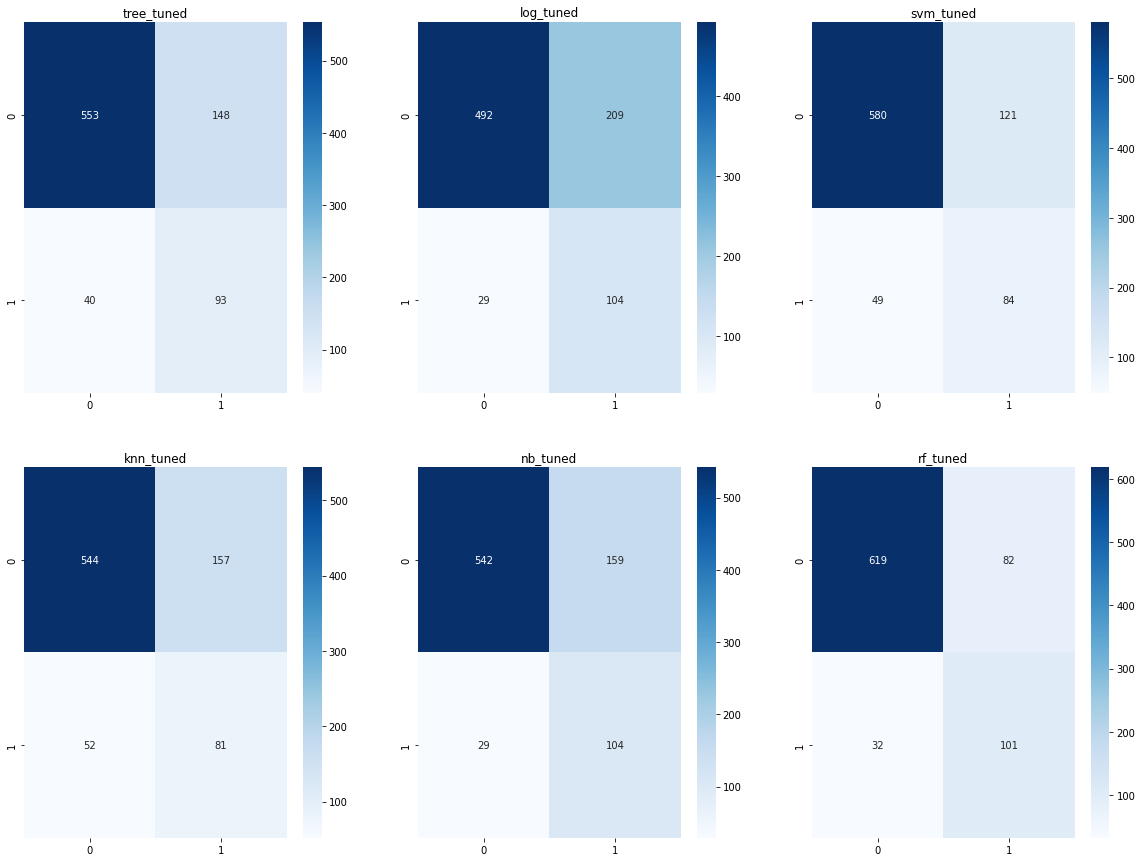

In [103]:
#looping for confusion matrix heatmap
plt.figure(figsize=(20, 15))
for i in range(len(comparison_tuned.Model)):
  plt.subplot(2, 3, i+1)
  ax = sns.heatmap(cf[i], annot=True, cmap='Blues', fmt='g')
  ax.set_xticklabels(['0', '1'])
  ax.set_yticklabels(['0', '1'])
  plt.title(comparison_tuned.iloc[i, 0])
plt.show()

In [104]:
comparison_tuned

,Model,f1_score_train,f1_score_test,recall_train,recall_test
0,tree_tuned,0.79,0.75,0.52,0.44
1,log_tuned,0.71,0.64,0.72,0.78
2,svm_tuned,0.63,0.80,0.45,0.63
3,knn_tuned,1.00,0.64,1.00,0.61
4,nb_tuned,0.75,0.69,0.70,0.78
5,rf_tuned,0.88,0.78,0.83,0.79


saya akan memilih berdasarkan nilai recall karena saya bertujuan untuk menghindari adanya false negative dimana model memprediksi tidak akan churn padahal customer tersebut akan churn

Setelah melewati model evaluation, ternyata model random forest memiliki nilai recall yang bagus pada train 83% dan pada test 79%. walaupun knn memiliki nilai yang sempurna pada f1 score tapi pada nilai recallnya jauh dibawah random forest. Maka dari itu menurut saya random forest adalah model terbaik untuk memprediksi churn.

dilihat dari confusion matrix pun, model random forest menebak false negative hanya 26 saja. selain itu jumlah tebakan yang salah berjumlah 111 data saja

In [105]:
grid_rf.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 7,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 300}

Saya akan mencoba menggunakan dafa inference untuk membuat prediksi churn menggunakan random forest dengan best parameter

### Save pkl file

In [106]:
with open("pipe.pkl", "wb") as a:
    pickle.dump(rf_best, a)

# **9. Model Inference**

Bagian ini akan diisi oleh uji coba model terbaik terhadap data inference dan mencoba apakah file pkl berfungsi pada data inf atau tidak

In [107]:
column = X_train_clean.columns

df_inf = df_inf[column]

df_inf.reset_index(drop=True,inplace=True)

df_inf

,acc_lenght,cc_info,desk_session,desk_trans,total_prod_dv,promotion_click,sale_prod_view,disrate_per_visprod,app_trans,add_to_cart_session,cs_calls
0,78,no,139,16,140,113,125,12.89,3,3.19,3
1,49,no,214,23,79,93,128,10.79,7,4.21,0
2,68,no,222,17,107,102,107,7.31,3,2.54,2
3,141,no,192,13,111,87,82,7.91,6,2.97,0
4,60,yes,266,18,113,94,82,4.86,12,3.78,0
5,72,no,197,13,88,129,118,12.12,3,1.84,0
6,90,no,193,22,66,85,97,9.65,4,3.00,0
7,94,no,174,20,85,114,94,9.35,1,2.13,1
8,114,yes,175,19,104,92,91,5.23,10,3.32,2
9,94,no,119,17,90,57,100,7.75,6,2.81,3


In [108]:
#load file pkl

with open("pipe.pkl", "rb") as a:
    pipeline = pickle.load(a)

In [109]:
#prediksi menggunakan logistic regression dengan parameters terbaik
#menggunakan file pkl yang telah di load

y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn prediction'])
y_pred_inf

,Churn prediction
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [110]:
#menggabungkan prediksi dengan data inf
data_final = pd.concat([df_inf, y_pred_inf], axis=1)

#hasil akhir prediksi
data_final

,acc_lenght,cc_info,desk_session,desk_trans,total_prod_dv,promotion_click,sale_prod_view,disrate_per_visprod,app_trans,add_to_cart_session,cs_calls,Churn prediction
0,78,no,139,16,140,113,125,12.89,3,3.19,3,0
1,49,no,214,23,79,93,128,10.79,7,4.21,0,0
2,68,no,222,17,107,102,107,7.31,3,2.54,2,0
3,141,no,192,13,111,87,82,7.91,6,2.97,0,0
4,60,yes,266,18,113,94,82,4.86,12,3.78,0,1
5,72,no,197,13,88,129,118,12.12,3,1.84,0,0
6,90,no,193,22,66,85,97,9.65,4,3.00,0,0
7,94,no,174,20,85,114,94,9.35,1,2.13,1,0
8,114,yes,175,19,104,92,91,5.23,10,3.32,2,1
9,94,no,119,17,90,57,100,7.75,6,2.81,3,0


Model dapat berjalan secara normal di data inference

# **10. Conclusion**

Eksplorasi Data Analysis:
-    Customer cenderung lebih lama banyak saat menggunakan desktop
-    Customer yang memilih untuk meninggalkan e-commerce cenderung menghabiskan waktu lebih lama saat menggunakan applikasi.
-    Customer yang memilih stay cenderung menghabiskan waktu lebih lama saat menggunakan desktop.
-    Customer cenderung tidak menyimpan informasi kartu kreditnya

Data Preprocessing :
-    Melakukan SMOTENC karena data tersebut imbalance.
-    Melakukan prediksi dengan 6 model dan akan dicari yang terbaik.

Model Evaluation :
-    Menggunakan recall sebagai parameter menentukan model terbaik.
-    Random Forest adalah model terbaik.
-    Model Random Forest sebelum Tuning :

    -   Recall train : 1.00

    -   Recall test : 0.71

-    Model Random Forest setelah Tuning :

    -   Recall train : 0.83

    -   Recall test : 0.79

    -   jumlah tebakan salah : 111 
    
-    Model Best Parameter :

    -   criterion : gini

    -   max_depth : 7

    -   max_features : auto

    -   n_estimators : 200

*Untuk menghasilkan model yang lebih baik lagi disarankan untuk mengubah beberapa parameter dan mencoba beberapa model boosting*